In [10]:
import glob
import pandas as pd
import seaborn as sns

In [11]:
'''
def map_first_lines(file_list):
        for file in file_list:
            with open(file, 'rt') as fd:
                yield fd.readline()
                
def merge_first_lines(file_list, filename):
    with open(filename, 'w') as f:
        for line in map_first_lines(file_list):
            f.write("%s\n" % line)
            
for i in range(1, 4):
    files = glob.glob("3000tweet/"+str(i)+"/*.txt")
    filename='3000tweet/'+str(i)+'.txt'
    merge_first_lines(files,filename)
'''

'\ndef map_first_lines(file_list):\n        for file in file_list:\n            with open(file, \'rt\') as fd:\n                yield fd.readline()\n                \ndef merge_first_lines(file_list, filename):\n    with open(filename, \'w\') as f:\n        for line in map_first_lines(file_list):\n            f.write("%s\n" % line)\n            \nfor i in range(1, 4):\n    files = glob.glob("3000tweet/"+str(i)+"/*.txt")\n    filename=\'3000tweet/\'+str(i)+\'.txt\'\n    merge_first_lines(files,filename)\n'

In [12]:
df = pd.read_csv("3000tweet/3000tweet.csv", sep=';',encoding="utf8")

In [13]:
df.head()

,tweet,durum
0,dun Turkcelle tepkilerimizden sonra bugün Turk...,1
1,girmezmiyim.. Turkcell kartim bile var.. Yarin...,1
2,tam tünelden gecerken 3g cekiyordu :D türkcell...,1
3,turkcell superonline fiber internet veya ADSL ...,1
4,bence Gnçtrkcll Ark Winterfest 2012'de 1.olur ...,1


In [14]:
myX = df.iloc[:,0].values 
myY = df.iloc[:,1].values

In [15]:
myX

array(['dun Turkcelle tepkilerimizden sonra bugün Turkcell twittera sponsor olmuş. Ne tesadüf değil mi ? :)',
       'girmezmiyim.. Turkcell kartim bile var.. Yarindan itibaren onu takicam.. Twittersiz denedim sadece 3 gun yapabildim:)))))',
       "tam tünelden gecerken 3g cekiyordu :D türkcell'in reklamlari vodafone' harekete gecirmis olmali:)",
       ...,
       'özturkcell e dönücz diye korkuyorum ama çanakkale holdingiz bişeycik olmaz',
       'turkcell se 532 yi ara puk kodunu ogrenme menusunden ogren. Baska yolu yok tatlim',
       "CHIP Galaxy Y ve Chat Türkiye'de!: Samsung'un kompakt cebi Galaxy Y ve QWERTY klavyeli cep Ch Turkcell ava..."],
      dtype=object)

In [16]:
myY

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

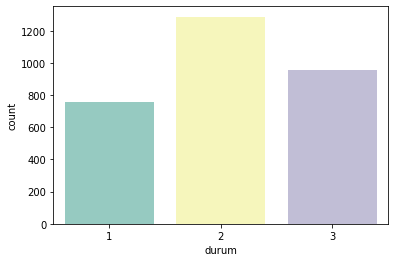

In [17]:
ax = sns.countplot(x="durum", data=df, palette="Set3")

In [18]:
df.shape

(3000, 2)

In [19]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [20]:
from gensim.utils import simple_preprocess

In [21]:
def read_questions(row,column_name):
    return simple_preprocess(str(row[column_name]).encode('utf-8'))
    
documents = []
for index, row in df.iterrows():
    documents.append(read_questions(row,"tweet"))

In [22]:
print("List of lists. Let's confirm: ", type(documents), " of ", type(documents[0]))

List of lists. Let's confirm:  <class 'list'>  of  <class 'list'>


In [23]:
from gensim.models import Word2Vec

In [24]:
model = Word2Vec(size=150, window=10, min_count=2, sg=1, workers=10)
model.build_vocab(documents)  # prepare the model vocabulary

In [39]:
print(documents)

[['dun', 'turkcelle', 'tepkilerimizden', 'sonra', 'bugün', 'turkcell', 'twittera', 'sponsor', 'olmuş', 'ne', 'tesadüf', 'değil', 'mi'], ['girmezmiyim', 'turkcell', 'kartim', 'bile', 'var', 'yarindan', 'itibaren', 'onu', 'takicam', 'twittersiz', 'denedim', 'sadece', 'gun', 'yapabildim'], ['tam', 'tünelden', 'gecerken', 'cekiyordu', 'türkcell', 'in', 'reklamlari', 'vodafone', 'harekete', 'gecirmis', 'olmali'], ['turkcell', 'superonline', 'fiber', 'internet', 'veya', 'adsl', 've', 'sabit', 'telefon', 'hizmetleri'], ['bence', 'gnçtrkcll', 'ark', 'winterfest', 'de', 'olur', 'da', 'gelir'], ['turkcell', 'sana', 'kıyak', 'geçiyor'], ['turkcelle', 'bağlan', 'hayata', 'diyorum'], ['kimse', 'takmıyo', 'beni', 'yaaaaa', 'turkcell', 'bana', 'mesaj', 'aaat'], ['bu', 'turkcell', 'pusula', 'uygulaması', 'iphone', 'kullanıcıları', 'için', 'büyük', 'nimet', 'oturduğum', 'yerden', 'nöbetçi', 'eczane', 'kaç', 'metre', 'ötemde', 'bana', 'söylüyor'], ['zaman', 'sorun', 'yok', 'bende', 'turkcell', 'için', '

In [26]:
model.train(sentences=documents, total_examples=len(documents), epochs=model.iter)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(104094, 168875)

In [27]:
word_vectors = model.wv
count = 0
for word in word_vectors.vocab:
    if count<10:
        print(word)
        count += 1
    else:
        break

dun
turkcelle
sonra
bugün
turkcell
sponsor
olmuş
ne
tesadüf
değil


In [28]:
len(word_vectors.vocab)

3177

In [29]:
vector = model.wv["sonra"]  # numpy vector of a word
len(vector)

150

In [30]:
vector

array([ 1.40672448e-04,  5.68093956e-02,  1.03725404e-01,  2.12708965e-01,
        3.27541381e-01,  4.70056422e-02, -8.14179033e-02, -6.73586875e-02,
       -5.81122898e-02, -1.75383270e-01, -1.98476151e-01,  3.91927883e-02,
        2.21426114e-02,  1.08877942e-01, -2.04587132e-01, -2.27751836e-01,
       -4.12373655e-02, -2.61541475e-02,  1.78801585e-02,  2.15796351e-01,
       -1.43630430e-01, -1.14706988e-02,  2.37374768e-01, -2.39667773e-01,
        3.34727131e-02, -1.55208692e-01, -5.16201109e-02, -1.54455185e-01,
       -9.23965126e-02, -3.67468707e-02,  1.06098376e-01, -1.79435521e-01,
        2.60823276e-02,  8.66686460e-03, -6.13021366e-02,  2.21803356e-02,
       -7.51537159e-02,  9.26755890e-02,  1.07910022e-01,  9.26295146e-02,
        2.58512292e-02, -6.32682294e-02,  5.62031753e-02,  8.90633762e-02,
        5.73316310e-03, -1.96553409e-01,  4.87446599e-03,  5.54452604e-03,
       -6.03380725e-02,  1.17930710e-01,  3.92082892e-03,  1.25060394e-01,
        3.14416997e-02, -

In [31]:
wanted_words = []
count = 0
for word in word_vectors.vocab:
    if count<150:
        wanted_words.append(word)
        count += 1
    else:
        break
wanted_vocab = dict((k, word_vectors.vocab[k]) for k in wanted_words if k in word_vectors.vocab)
wanted_vocab

{'dun': <gensim.models.keyedvectors.Vocab at 0x1c7b3ad1588>,
 'turkcelle': <gensim.models.keyedvectors.Vocab at 0x1c7b3ad1648>,
 'sonra': <gensim.models.keyedvectors.Vocab at 0x1c7b3ad17c8>,
 'bugün': <gensim.models.keyedvectors.Vocab at 0x1c7b3ad1808>,
 'turkcell': <gensim.models.keyedvectors.Vocab at 0x1c7b3ad1888>,
 'sponsor': <gensim.models.keyedvectors.Vocab at 0x1c7b3ad1908>,
 'olmuş': <gensim.models.keyedvectors.Vocab at 0x1c7b3ad1948>,
 'ne': <gensim.models.keyedvectors.Vocab at 0x1c7b3ad1988>,
 'tesadüf': <gensim.models.keyedvectors.Vocab at 0x1c7b3ad1848>,
 'değil': <gensim.models.keyedvectors.Vocab at 0x1c7b3ad18c8>,
 'mi': <gensim.models.keyedvectors.Vocab at 0x1c7b3ad19c8>,
 'bile': <gensim.models.keyedvectors.Vocab at 0x1c7b3ad1a08>,
 'var': <gensim.models.keyedvectors.Vocab at 0x1c7b3ad1a48>,
 'itibaren': <gensim.models.keyedvectors.Vocab at 0x1c7b3ad1a88>,
 'onu': <gensim.models.keyedvectors.Vocab at 0x1c7b3ad1ac8>,
 'denedim': <gensim.models.keyedvectors.Vocab at 0x1c7

In [32]:
from sklearn.manifold import TSNE

In [33]:
X = model[wanted_vocab] # X is an array of word vectors, each vector containing 150 tokens
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [34]:
from matplotlib import pyplot as plt

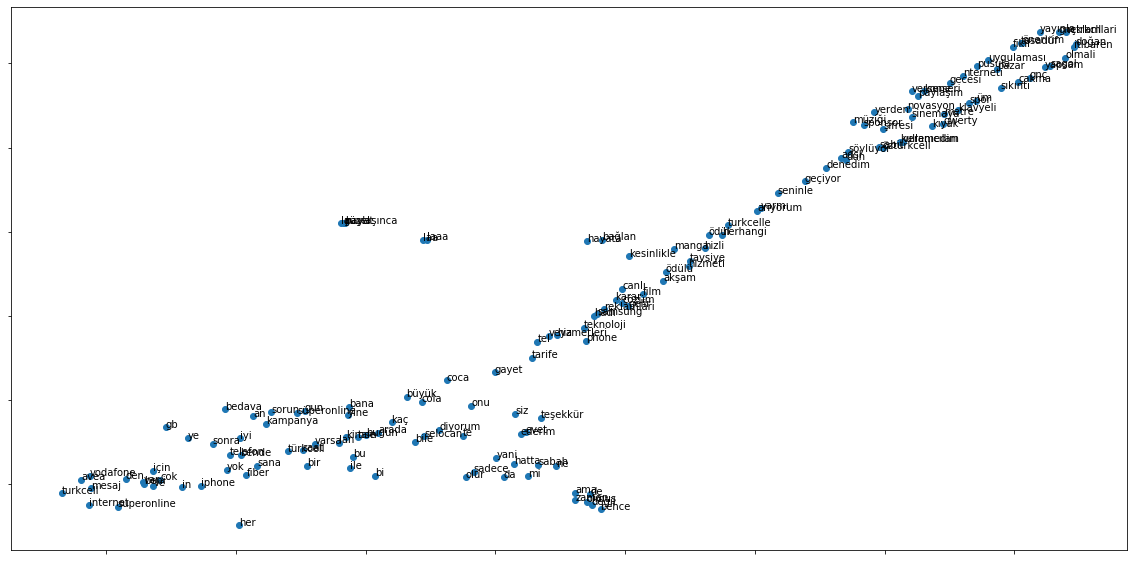

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(wanted_vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
_ = plt.show()

In [36]:
w1 = ["hayata"]
w2 = ["bağlan"]
model.wv.most_similar (positive=w1,negative=w2,topn=5)

[('la', 0.2034001499414444),
 ('güzel', 0.19823183119297028),
 ('hayat', 0.19654148817062378),
 ('paylaşınca', 0.19532421231269836),
 ('laaa', 0.12625691294670105)]

In [37]:
model.wv.doesnt_match(["hizli","herhangi","kaç"])


D:\ProgramData\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'kaç'